# Pregunta 1
Obtener la lista de productos que se venden en al menos el 80% de los puntos de venta.

##### PRODUCTOS QUE SE VENDIERON EN POR LO MENOS 80% DE LOS PUNTOS DE VENTAS #####

AGUA SABORIZADA SALUS FRUTTE DURAZNO 1,65L
AGUA SABORIZADA SALUS FRUTTE MARACUYA 1,65L
AGUA SABORIZADA SALUS FRUTTE NARANJA 1,65L
AGUA SABORIZADA SALUS FRUTTE POMELO 1,65L
AGUA SABORIZADA SALUS FRUTTE MANZANA 2,25L
AGUA SABORIZADA SALUS FRUTTE NARANJA 2,25L
AGUA SABORIZADA SALUS FRUTTE CERO ANANA 1,65L
AGUA SABORIZADA SALUS FRUTTE CERO POMELO 1,65L
###################################################################################



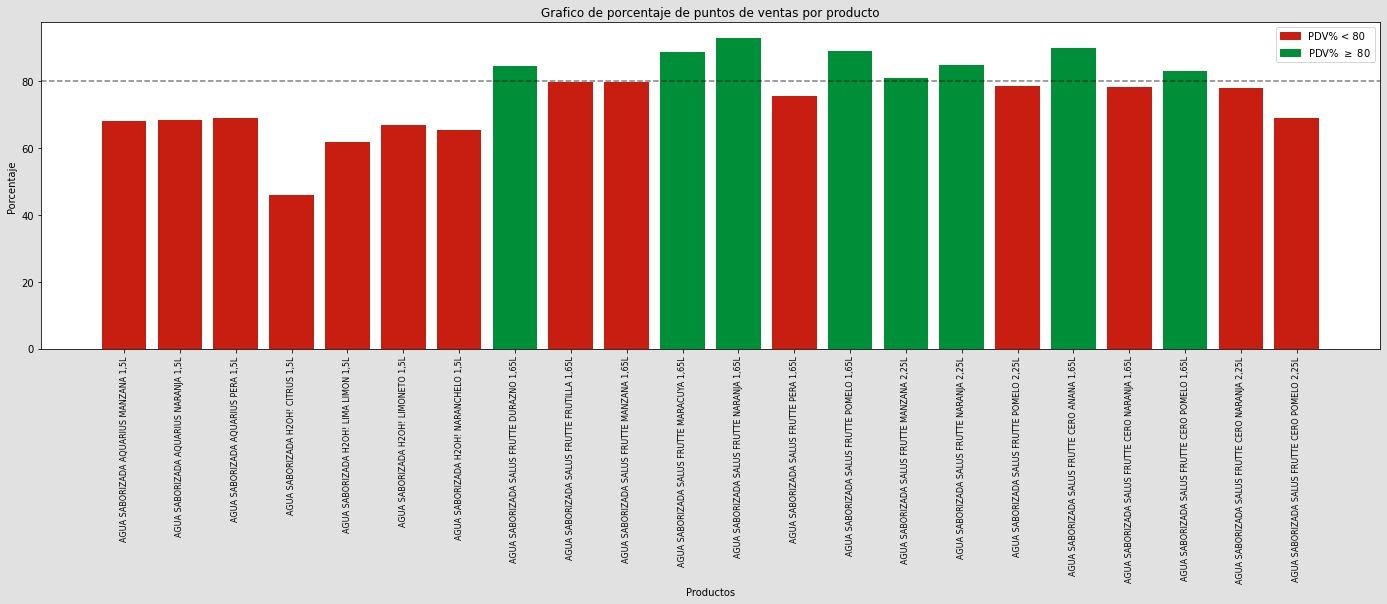

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

file_prod = 'productos.csv'
file_vent = 'ventas.csv'

df_prod = pd.read_csv(file_prod)
df_vent = pd.read_csv(file_vent)

# Codigo de barras y descripcion de los productos
codigo_barra_de_productos = df_prod['codigo_barras']
nomb_prod = df_prod['descripcion']

# Numero de puntos de ventas
num_pdv_unique = len( pd.unique( df_vent['pdv_codigo'] ) )

porcentaje_pdv_por_prod = []
color_por_porcentaje = []
nom_prod_pdv_mayor_80 = []

for codigo_barra in codigo_barra_de_productos:

  # Filtramos las ventas por codigo de barrar de los producto
  # Luego obtenemos el numero de pdv que tiene ese producto 
  df_vent_filter_prod = df_vent.loc[ df_vent['codigo_barras'] == codigo_barra ]
  num_pdv_unique_por_prod = len( pd.unique(df_vent_filter_prod['pdv_codigo']) )

  # Evaluando el porcentaje
  porcentaje = 100 * num_pdv_unique_por_prod/num_pdv_unique
  porcentaje_pdv_por_prod.append( porcentaje )

  # Condicional para obtener los productos que estan presente en mas del 80% 
  if ( porcentaje >= 80 ):
    color_por_porcentaje.append('#008f39')
    prod_mayor_80 = df_prod.loc[ df_prod['codigo_barras'] == codigo_barra ]
    nom_prod_pdv_mayor_80.append( list(prod_mayor_80['descripcion'])[0] )
  else:
    color_por_porcentaje.append('#c81d11')

print("##### PRODUCTOS QUE SE VENDIERON EN POR LO MENOS 80% DE LOS PUNTOS DE VENTAS #####\n")
for prod in nom_prod_pdv_mayor_80:
  print(prod)
print("###################################################################################\n")


# Visualizacion
plt.figure(1,figsize=(24,6),facecolor="#e1e1e1")
plt.title("Grafico de porcentaje de puntos de ventas por producto")
plt.bar(nomb_prod,porcentaje_pdv_por_prod ,color = color_por_porcentaje,label='x')
plt.axhline(y=80, xmin=0, xmax=1 , c='k',alpha=0.5 , ls ='--' )
plt.xticks(rotation=90,fontsize=8)
plt.xlabel("Productos")
plt.ylabel("Porcentaje")
red_patch = mpatches.Patch(color='#c81d11', label='PDV% < 80')
green_patch = mpatches.Patch(color='#008f39', label='PDV% $\geq$ 80')
plt.legend(handles=[red_patch,green_patch])
plt.show()


#Pregunta 2

Ordenar los productos de mayor a menor según su venta en volumen (suma de los 6 meses) y quedarse con los que acumulan el 80% (Pareto).

#### Nombre de los productos con un volumen acumulado menor al 80% ####

AGUA SABORIZADA SALUS FRUTTE NARANJA 1,65L
AGUA SABORIZADA SALUS FRUTTE CERO ANANA 1,65L
AGUA SABORIZADA SALUS FRUTTE NARANJA 2,25L
AGUA SABORIZADA SALUS FRUTTE CERO NARANJA 2,25L
AGUA SABORIZADA SALUS FRUTTE MARACUYA 1,65L
AGUA SABORIZADA SALUS FRUTTE POMELO 1,65L
AGUA SABORIZADA SALUS FRUTTE MANZANA 2,25L
AGUA SABORIZADA SALUS FRUTTE POMELO 2,25L
AGUA SABORIZADA SALUS FRUTTE CERO POMELO 1,65L
AGUA SABORIZADA SALUS FRUTTE DURAZNO 1,65L
AGUA SABORIZADA SALUS FRUTTE CERO NARANJA 1,65L
AGUA SABORIZADA H2OH! NARANCHELO 1,5L
AGUA SABORIZADA H2OH! LIMONETO 1,5L
AGUA SABORIZADA SALUS FRUTTE CERO POMELO 2,25L


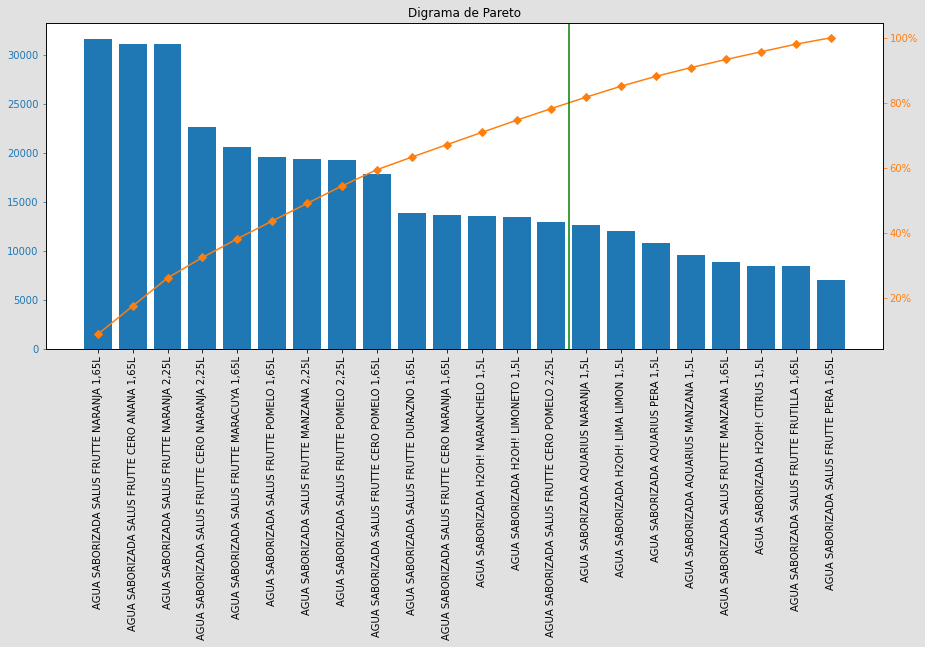

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

file_prod = 'productos.csv'
file_vent = 'ventas.csv'

df_prod = pd.read_csv(file_prod)
df_vent = pd.read_csv(file_vent)

codigos_de_barras = df_prod['codigo_barras']


list_dic = []
for cod in codigos_de_barras:
  
  # Filtramos las ventas por codigo de barras por producto y sumamos el total
  cant_vta_cod_barr = df_vent['cant_vta'].loc[ df_vent['codigo_barras'] == cod].sum()

  # Guardamos el resultado en una lista de diccionarios ( Formato DataFrame)
  dic_temp = {}
  dic_temp['Vol.Total'] = cant_vta_cod_barr
  list_dic.append(dic_temp)


# Creamos el DataFrame 
df_new = pd.DataFrame({})
df_new['Nomb.Product'] = df_prod['descripcion']
df_new['Cod. Barras'] = df_prod['codigo_barras'].map( lambda x:str(x) ) # Lo convertimos a str por temas de viasualizacion
df_new['Frec. Absoluta'] = pd.DataFrame(list_dic)
df_new['Frec. Relativa %'] = 100*df_new['Frec. Absoluta']/(df_new['Frec. Absoluta'].sum())
df_new = df_new.sort_values(by=['Frec. Absoluta'],ascending=False) # Ordenamos segun las frecuencias absolutas


# Calculo de las frecuencia acumulada
Frec_rela_val = df_new['Frec. Relativa %'].values
acum = []
valor_acum = 0
for i in Frec_rela_val:
  valor_acum = valor_acum + i
  acum.append(valor_acum)

df_new['Frec. Relativa acum%'] = acum
df_new["Menor del 80%"] = df_new["Frec. Relativa acum%"].map(lambda x: 1 if x<80 else 0)

#print( df_new )

# Nombre de los productos que acumulan un hasta el 80% del volumen
print("#### Nombre de los productos con un volumen acumulado menor al 80% ####\n")
mask = (df_new['Menor del 80%'] == 1)
df_new_filter_80_menor = df_new.loc[mask]

prod_80_menor_de_volumen = []
for nomb in df_new_filter_80_menor['Nomb.Product']:
  print(nomb)
  prod_80_menor_de_volumen.append(nomb)



### Visualizacion ###
fig = plt.figure(1,figsize=(15,6),facecolor="#e1e1e1")
ax = fig.add_subplot(1,1,1)

ax.set_title("Digrama de Pareto")

ax.bar( df_new['Nomb.Product'] , df_new['Frec. Absoluta'] , color="C0")

ax2 = ax.twinx()
ax2.plot( df_new['Nomb.Product'] , df_new['Frec. Relativa acum%'] , color ="C1" , marker='D' , ms = 5 )
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis='y',colors="C0")
ax2.tick_params(axis='y',colors="C1")

ax.set_xticklabels( df_new['Nomb.Product'] , rotation = 90)
plt.axvline(x=13.5, ymin=0, ymax=80 , c='g')

plt.show()

# Pregunta 3

Obtener para cada producto el identificador (pdv_codigo) de uno cualquiera de los puntos de venta que lo vende con mayor frecuencia.

Considerar solamente los productos que están presentes en al menos el 80% de los puntos de venta (pregunta 1) y en el top 80% de la venta en volumen (pregunta 2).

Si un punto de venta no tiene venta de ningún producto en una fecha, se deberá considerar que esa fecha el punto de venta estuvo cerrado.
Para el cálculo de la frecuencia considerar solamente los días que el punto de venta estuvo abierto (tuvo alguna venta). Por ejemplo, si un producto en un punto de venta se vende todos los días de lunes a sábado y el punto de venta está cerrado los domingos, la frecuencia tiene que ser cada 1 día.

Estrategia:

* Se calcula el promedio de las diferencias de dias de ventas de los productos por punto de venta ( pdv )
* Se calcula los dias que cada punto de venta estuvo cerrado.
* Se resta de la diferencia de dias de venta los dias que el punto de venta estuvo cerrado.
* El termino 'mayor frecuencia' se interpreta como el que se vende mas rapido.es decir que el que tenga menor frecuencia de venta. 

Por ejemplo prod1.frec: 2 dias y prod2.frec: 3 dias , quien se vende con mayor frecuencia es prod1.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from datetime import datetime, timedelta

file_prod = 'productos.csv'
file_vent = 'ventas.csv'

df_prod = pd.read_csv(file_prod)
df_vent = pd.read_csv(file_vent)


pregunta_1 = set(nom_prod_pdv_mayor_80)
pregunta_2 = set(prod_80_menor_de_volumen)

# Inteseccion de los dos conjuntos
nomb_prducto_and = pregunta_1 & pregunta_2

# Creamos un DataFrame con codigos de barras y la descripcion de los productos
list_dict = []
for prod in nomb_prducto_and:
  dict_temp = {}
  dict_temp['codigo_barras'] = list(df_prod['codigo_barras'].loc[ df_prod['descripcion'] == prod ])[0]
  dict_temp['descripcion'] = prod

  list_dict.append(dict_temp)
  
df_prducto_cod = pd.DataFrame(list_dict)
print(df_prducto_cod)

   codigo_barras                                     descripcion
0  7730400003432     AGUA SABORIZADA SALUS FRUTTE MARACUYA 1,65L
1  7730400003980      AGUA SABORIZADA SALUS FRUTTE MANZANA 2,25L
2  7730400001707   AGUA SABORIZADA SALUS FRUTTE CERO ANANA 1,65L
3  7730400001835  AGUA SABORIZADA SALUS FRUTTE CERO POMELO 1,65L
4  7730400003300      AGUA SABORIZADA SALUS FRUTTE NARANJA 2,25L
5  7730400003920      AGUA SABORIZADA SALUS FRUTTE NARANJA 1,65L
6  7730400003480       AGUA SABORIZADA SALUS FRUTTE POMELO 1,65L
7  7730400003002      AGUA SABORIZADA SALUS FRUTTE DURAZNO 1,65L


In [ ]:
def Fecha_De_NoAtencion_por_pdv(pdv_cod,df_vent):
  """
  Parametros : 
      --> pdv_cod : Codigo del punto de venta
      --> df_vent : DataFrame de las ventas
  Return :
      --> Retorna los dias que el punto de venta no atendio

  """
  df_vent_filter_prod = df_vent.loc[ df_vent['pdv_codigo'] == pdv_cod ]
  
  # Conjunto de fechas del (2020-06-01 - 2020-11-30)
  inicio = datetime(2020,6,1)
  fin    = datetime(2020,11,30) 
  fechas_completas = set([str(inicio + timedelta(days=d))[:10] for d in range((fin - inicio).days + 1)])
  
  # Conjunto de fechas donde atendio el punto de venta
  fecha_df = set( pd.unique(df_vent_filter_prod['fecha_comercial']) )

  diferencia_fechas = fechas_completas - fecha_df

  return diferencia_fechas


def Fecha_De_NoAtencion_En_Intervalo( invervalo_de_fechas , fecha_1 , fecha_2 ):
  """
  Parametros : 
      --> invervalo_de_fechas : Conjunto de fechas
      --> fecha_1 : fecha de inicio del segun conjunto
      --> fecha_2 : fecha de fin del segun conjunto
  Return :
      --> Retorna el numero de dias que hay en comun entre el invervalo_de_fechas
          y el intervalo [fecha1,fecha2]
  """
  
  f1 = { 'ano':int(fecha_1[:2]) , 'mes':int(fecha_1[3:5]) , 'dia':int(fecha_1[6:]) }
  f2 = { 'ano':int(fecha_2[:2]) , 'mes':int(fecha_2[3:5]) , 'dia':int(fecha_2[6:]) }

  inicio = datetime(f1['ano'],f1['mes'],f1['dia'])
  fin    = datetime(f2['ano'],f2['mes'],f2['dia'])
  
  fechas_de_2_a_1 = set([str(inicio + timedelta(days=d))[:10] for d in range((fin - inicio).days + 1)])

  return len(invervalo_de_fechas & fechas_de_2_a_1)


def Frec_Prom_por_pdv_prod( df_vent,pdv_cod,cod_barras ):
  """
  Parametros : 
      --> df_vent : DataFrame de las ventas.
      --> pdv_cod : Codigo del punto de venta especifico.
      --> cod_barras : Codigo de barras para el producto especifico.
  Return :
      --> Retorna la frecuencia promedio de venta para el un punto de venta 
          y producto especifico.
  """

  # Filtramos primero por punto de venta y luego filtramos por codigo de barras
  df_vent_filter_prod = df_vent.loc[ df_vent['pdv_codigo'] == pdv_cod ]
  df_vent_filter_producto = df_vent_filter_prod.loc[ df_vent_filter_prod['codigo_barras'] == cod_barras ]
  
  # Creamos un dataframe (df_new_fecha) con los datos anteriormente fitrados
  # y modificamos el formato de las fechas de 2020-06-02 --> 20-06-02
  df_new = df_vent_filter_producto.sort_values(by=['fecha_comercial'] , ignore_index=True)
  df_new_fecha = df_new['fecha_comercial'].map( lambda x:x[2:] )

  # Conjunto con fechas de no atencion del pdv
  fecha_no_atentcion_pdv = Fecha_De_NoAtencion_por_pdv(pdv_cod,df_vent)

  dif_dias = []

  # Generamos una lista con las diferencia de dias entre dos ventas seguidas del mismo producto.
  # Se considero que se debe restar los dias que el punto de venta estuvo cerrado.
  for i in range(len(df_new_fecha)-1):
    

    fecha_intev = [ df_new_fecha.iloc[i] ,  df_new_fecha.iloc[i+1] ]

    date_time_obj_1 = datetime.strptime(fecha_intev[0], '%y-%m-%d')
    date_time_obj_2 = datetime.strptime(fecha_intev[1], '%y-%m-%d')

    dif = date_time_obj_2 - date_time_obj_1

    if ( dif.days > 1 ):
      # dias_no_atend , numero de dias que no atendio el pdv en un intervalo.
      dias_no_atend = Fecha_De_NoAtencion_En_Intervalo( fecha_no_atentcion_pdv , fecha_intev[0] , fecha_intev[1] )
      dif_final = dif.days - dias_no_atend
    else:
      dif_final = dif.days
    
    dif_dias.append(dif_final)


  if len(dif_dias)==0:
    return 0
  else:
    return sum(dif_dias)/len(dif_dias)


def df_frec_cod_pdv(df_vent):
  """
  Parametros : 
      --> df_vent : DataFrame de las ventas.
  Return :
      --> Retorna un DataFrame con la informacion( pdv_codigo , codigo_barra , frec.Promedio )
          de todos los puntos de ventas.
  """
  list_prom_frec = []

  for pdv_cod in pd.unique(df_vent['pdv_codigo']):

    df_vent_filter_prod = df_vent.loc[ df_vent['pdv_codigo'] == pdv_cod ]
    cod_barr_uni = pd.unique(df_vent_filter_prod['codigo_barras'])

    for i in cod_barr_uni:
      frec = Frec_Prom_por_pdv_prod( df_vent , pdv_cod ,cod_barras = i )
      dic_prom_frec={}
      dic_prom_frec['pdv_codigo'] = pdv_cod
      dic_prom_frec['codigo_barra'] = i
      dic_prom_frec['frec.Promedio'] = frec
      
      if ( frec != 0):
        list_prom_frec.append(dic_prom_frec)

  df = pd.DataFrame(list_prom_frec)

  return df

df_frec = df_frec_cod_pdv(df_vent)

print(df_frec)

      pdv_codigo   codigo_barra  frec.Promedio
0            514  7730400001518       1.616071
1            514  7730400001835       1.601770
2            514  7730400001247       1.448000
3            514  7730400003310       3.640000
4            514  7730400001707       1.219178
...          ...            ...            ...
7641        5047  7730400003556       8.000000
7642        5047  7730400001707       4.333333
7643        5047  7730400003104       1.000000
7644        5047  7730400003980       1.000000
7645        2745  7730400003002       7.000000

[7646 rows x 3 columns]


    pdv_codigo   codigo_barra  frec.Promedio min  \
14        1378  7730400003432           1.000000   
20        7522  7730400003980           1.000000   
4          627  7730400001707           1.120370   
1         7040  7730400001835           1.000000   
9         8448  7730400003300           1.000000   
8         9234  7730400003920           1.000000   
13        4911  7730400003480           1.273684   
17        4911  7730400003002           1.240741   

                                            nombre  
14     AGUA SABORIZADA SALUS FRUTTE MARACUYA 1,65L  
20      AGUA SABORIZADA SALUS FRUTTE MANZANA 2,25L  
4    AGUA SABORIZADA SALUS FRUTTE CERO ANANA 1,65L  
1   AGUA SABORIZADA SALUS FRUTTE CERO POMELO 1,65L  
9       AGUA SABORIZADA SALUS FRUTTE NARANJA 2,25L  
8       AGUA SABORIZADA SALUS FRUTTE NARANJA 1,65L  
13       AGUA SABORIZADA SALUS FRUTTE POMELO 1,65L  
17      AGUA SABORIZADA SALUS FRUTTE DURAZNO 1,65L  


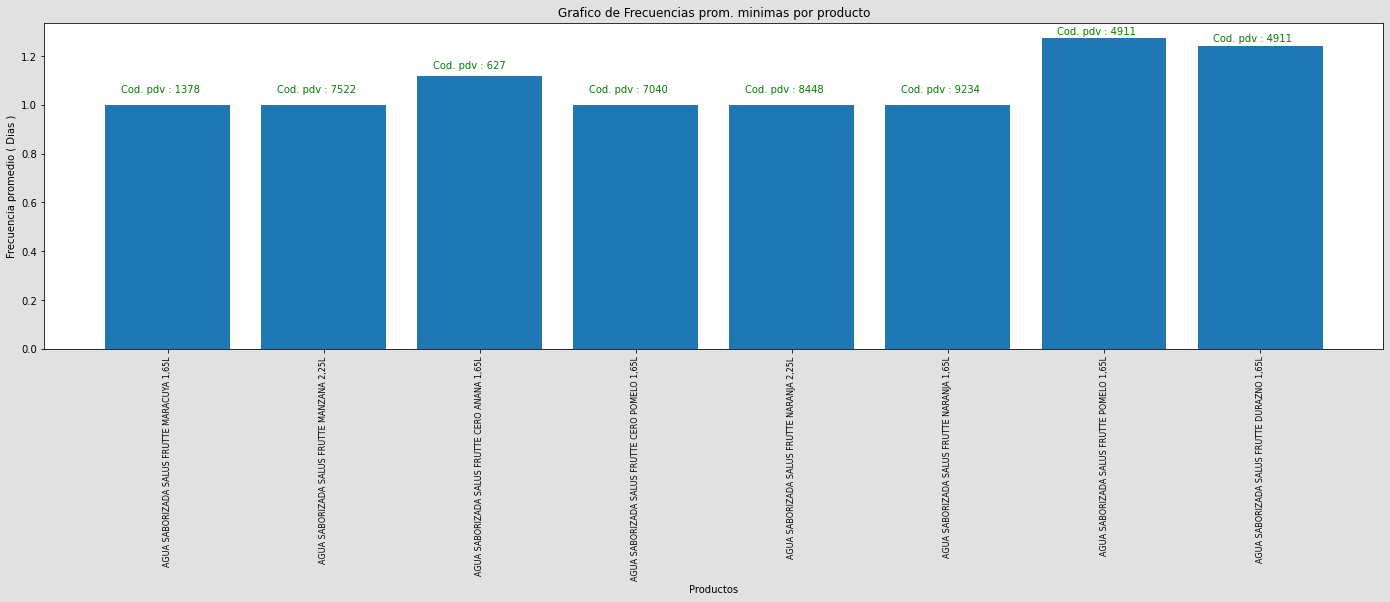

In [ ]:

#Generamos un DataFrame con ( pdv_codigo , codigo_barra , frec.Promedio min)
list_dict = []

for i in pd.unique(df_frec['codigo_barra']):
  df_frec_filter_prod = df_frec.loc[ df_frec['codigo_barra'] == i ]
  idxmin_frec = df_frec_filter_prod['frec.Promedio'].idxmin()
  
  df_frec_min = df_frec.iloc[[idxmin_frec]]
  dict_temp ={}
  dict_temp['pdv_codigo'] = list(df_frec_min['pdv_codigo'])[0]
  dict_temp['codigo_barra'] = list(df_frec_min['codigo_barra'])[0]
  dict_temp['frec.Promedio min'] = list(df_frec_min['frec.Promedio'])[0]

  list_dict.append(dict_temp)

df = pd.DataFrame(list_dict)


# Filtramos solo los productos ( df_prducto_cod - interseccion de la preg 1 y 2)
df_temp = pd.DataFrame({})
for i in df_prducto_cod['codigo_barras']:

  df_temp = pd.concat([ df_temp , df.loc[ df['codigo_barra'] == i ] ])



df_temp['nombre'] = df_temp['codigo_barra'].map( lambda x: list(df_prod['descripcion'].loc[ df_prod['codigo_barras'] == x])[0]  )

print( df_temp )


# Visualizacion
plt.figure(1,figsize=(24,6),facecolor="#e1e1e1")
plt.title("Grafico de Frecuencias prom. minimas por producto")
plt.bar(df_temp['nombre'],df_temp['frec.Promedio min'] )
plt.xticks(rotation=90,fontsize=8)
plt.xlabel("Productos")
plt.ylabel("Frecuencia promedio ( Dias )")
red_patch = mpatches.Patch(color='#c81d11', label='PDV% < 80')
green_patch = mpatches.Patch(color='#008f39', label='PDV% $\geq$ 80')
plt.text(-0.3, 1.05, 'Cod. pdv : 1378',c ='g')
plt.text(-0.3+1, 1.05, 'Cod. pdv : 7522',c ='g')
plt.text(-0.3+2, 1.15, 'Cod. pdv : 627',c ='g')
plt.text(-0.3+3, 1.05, 'Cod. pdv : 7040',c ='g')
plt.text(-0.3+4, 1.05, 'Cod. pdv : 8448',c ='g')
plt.text(-0.3+5, 1.05, 'Cod. pdv : 9234',c ='g')
plt.text(-0.3+6, 1.29, 'Cod. pdv : 4911',c ='g')
plt.text(-0.3+7, 1.26, 'Cod. pdv : 4911',c ='g')
plt.show()

#Pregunta 4

¿Cuál sería una forma adecuada de calcular la variación porcentual de la venta de la categoría durante los meses de setiembre a noviembre (suma de los meses) en relación a los meses de junio a agosto?

Calcule esta variación.

Tener en cuenta que no necesariamente tenemos información de todos los puntos de venta para todos los meses.


Dado que el termino ***venta de la categoria*** es un termino ambiguo se propone dos soluciones.

## 4.1 Variacion porcentual de ventas trimestral - PUNTOS DE VENTAS

Para el calculo de la variacion porcentual se tuvo las siguientes consideraciones :

* Los punto de venta tenga productos vendidos en los 6 meses.
* Se calcula el importe vendido trimestral dividido por los dias del trimeste

##### Variacion porcentual por trimeste de puntos de ventas #####

    pdv_codigo  varicion_porcentual
0          514            35.162620
1         8155            16.750252
2         7604            17.459113
3         3207            26.926005
4         8008            27.789144
..         ...                  ...
186       8099            22.758408
187        532            36.800580
188        245            18.000725
189       7713            38.330544
190       7618             9.482003

[191 rows x 2 columns]

Maxima variacion :  94.15538538181443
Minima variacion :  -31.072828349973904


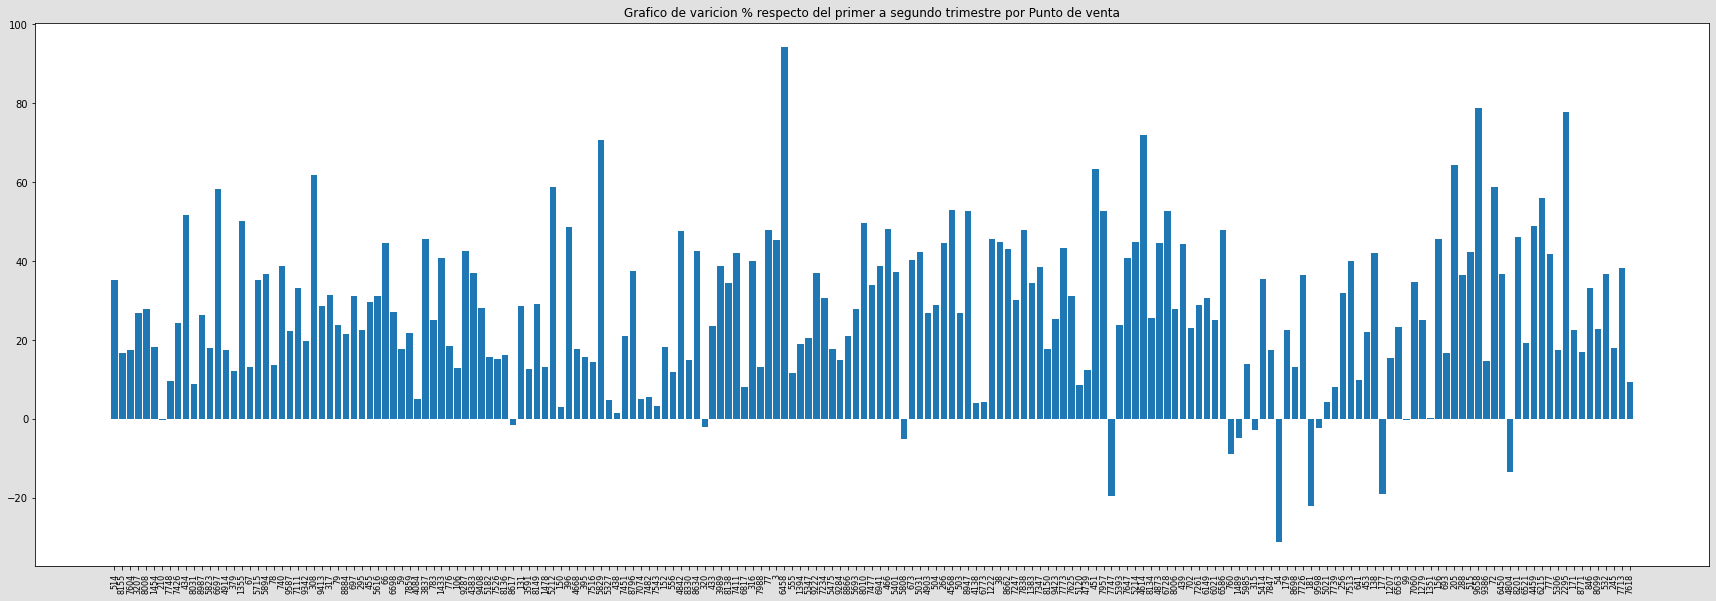

In [ ]:
import pandas as pd

file_prod = 'productos.csv'
file_vent = 'ventas.csv'

df_prod = pd.read_csv(file_prod)
df_vent = pd.read_csv(file_vent)

puntos_de_ventas = pd.unique( df_vent['pdv_codigo'] )

# Codigos de los pdv con 6 meses de ventas activos
pdv_codigo_6_meses = []
for pdv in puntos_de_ventas:
  df_vent_pdv = df_vent.loc[ df_vent['pdv_codigo'] == pdv ]
  pdv_meses = pd.unique( df_vent_pdv['fecha_comercial'].map(lambda x:x[5:7]) )
    
  if ( len(pdv_meses) == 6 ):
    pdv_codigo_6_meses.append(pdv)
    


list_dic = []
for pdv in pdv_codigo_6_meses:
  df_vent_pdv = df_vent.loc[ df_vent['pdv_codigo'] == pdv ]

  #Primer trimestre ( Junio - agosto)
  mask = (df_vent_pdv['fecha_comercial'] > '2020-06-01') & (df_vent_pdv['fecha_comercial'] <= '2020-08-31')
  df_vent_pdv_primer_trimestre = df_vent_pdv.loc[mask]
  num_dias_prim_tri = len(pd.unique( df_vent_pdv_primer_trimestre['fecha_comercial'] ))
  imp_vta_prim_tri= df_vent_pdv_primer_trimestre['imp_vta'].sum()

  #Segundo trimestre ( Septiembre - npviembre )
  mask = (df_vent_pdv['fecha_comercial'] > '2020-09-01') & (df_vent_pdv['fecha_comercial'] <= '2020-11-30')
  df_vent_pdv_segundo_trimestre = df_vent_pdv.loc[mask]
  num_dias_segu_tri = len(pd.unique( df_vent_pdv_segundo_trimestre['fecha_comercial'] ))
  imp_vta_segu_tri= df_vent_pdv_segundo_trimestre['imp_vta'].sum()

  dic_temp = {}
  dic_temp['pdv_codigo'] = str(pdv)
  dic_temp['num_dias_prim_tri'] = num_dias_prim_tri
  dic_temp['imp_vta_prim_tri'] = imp_vta_prim_tri
  dic_temp['num_dias_segu_tri'] = num_dias_segu_tri
  dic_temp['imp_vta_segu_tri'] = imp_vta_segu_tri

  list_dic.append(dic_temp)


df_new = pd.DataFrame(list_dic)

df_new['imp_vta_prim_tri_diario']=df_new['imp_vta_prim_tri']/df_new['num_dias_prim_tri']
df_new['imp_vta_segu_tri_diario']=df_new['imp_vta_segu_tri']/df_new['num_dias_segu_tri']
df_new['varicion_porcentual'] = 100*(df_new['imp_vta_segu_tri_diario'] - df_new['imp_vta_prim_tri_diario'])/df_new['imp_vta_prim_tri_diario']


print( "##### Variacion porcentual por trimeste de puntos de ventas #####\n")
# Seleccionamos las columans con pdv_codigo y varicion_porcentual
print( df_new.iloc[ :,[0, 7] ] )
print( "\nMaxima variacion : ",max(df_new['varicion_porcentual']) )
print( "Minima variacion : ",min(df_new['varicion_porcentual']) )

# Visualizacion
plt.figure(1,figsize=(30,10),facecolor="#e1e1e1")
plt.title( "Grafico de varicion % respecto del primer a segundo trimestre por Punto de venta" )
plt.bar( df_new['pdv_codigo'] , df_new['varicion_porcentual'] )
plt.xticks(rotation=90,fontsize=8)
plt.show()


## 4.2 Variacion porcentual de ventas trimestral - MARCA DE LOS PRODUCTOS

{'AQUARIUS': [7730197008076, 7730197008597, 7730197008006], 'H2OH!': [7734284001913, 7734284001185, 7734284001766, 7734284001157], 'SALUS FRUTTE': [7730400003002, 7730400003361, 7730400003104, 7730400003432, 7730400003920, 7730400003310, 7730400003480, 7730400003980, 7730400003300, 7730400003556], 'SALUS FRUTTE CERO': [7730400001707, 7730400001518, 7730400001835, 7730400001247, 7730400001161]} 

               marca  imp_vta_prim_tri  imp_vta_segu_tri  variacion_porcentual
0           AQUARIUS      7.839443e+05      1.333933e+06             41.230628
1              H2OH!      1.204080e+06      2.113352e+06             43.025098
2       SALUS FRUTTE      5.357788e+06      1.045180e+07             48.738122
3  SALUS FRUTTE CERO      2.757521e+06      5.757638e+06             52.106730 



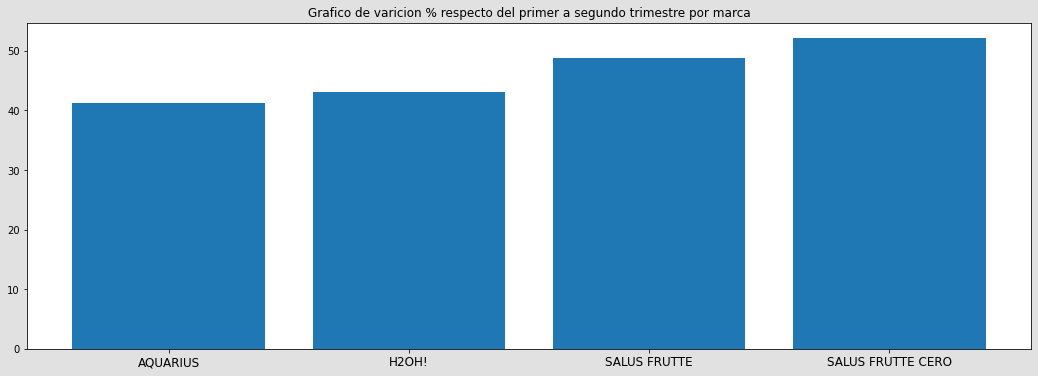

In [ ]:
import pandas as pd

file_prod = 'productos.csv'
file_vent = 'ventas.csv'

df_prod = pd.read_csv(file_prod)
df_vent = pd.read_csv(file_vent)

# Codigos de los productos por marca
marcas = pd.unique( df_prod['marca'] )

# Diccionario con llaves ( marca ) y contenido lista de cod.barra de la marca
dict_codigo_marca={}
for marca in marcas:
  dict_codigo_marca.update( {marca:list( df_prod['codigo_barras'].loc[ df_prod['marca']== marca] )} )

print(dict_codigo_marca,'\n')

list_dic = []

for i in dict_codigo_marca:

  # Filtro de codigos de barras pertenecientes a una misma marca
  mask = df_vent['codigo_barras'].map(lambda x : x in dict_codigo_marca[i] )
  df_vent_cod_barra = df_vent.loc[mask]
  
  # Filtro del primer trimestre ( Junio - agosto)
  mask = (df_vent_cod_barra['fecha_comercial'] > '2020-06-01') & (df_vent_cod_barra['fecha_comercial'] <= '2020-08-31')
  df_vent_prim_tri = df_vent_cod_barra.loc[mask]
  imp_vta_prim_tri= df_vent_prim_tri['imp_vta'].sum()


  # Filtro del segundo trimestre ( Septiembre - noviembre )
  mask = (df_vent_cod_barra['fecha_comercial'] > '2020-09-01') & (df_vent_cod_barra['fecha_comercial'] <= '2020-11-30')
  df_vent_segu_tri = df_vent_cod_barra.loc[mask]
  imp_vta_segu_tri= df_vent_segu_tri['imp_vta'].sum()

  dic_temp = {}
  dic_temp['marca'] = i
  dic_temp['imp_vta_prim_tri'] = imp_vta_prim_tri
  dic_temp['imp_vta_segu_tri'] = imp_vta_segu_tri

  list_dic.append(dic_temp)
  
df_new = pd.DataFrame(list_dic)
df_new['variacion_porcentual']= 100*( df_new['imp_vta_segu_tri'] - df_new['imp_vta_prim_tri'] )/df_new['imp_vta_segu_tri']

print(df_new,'\n')

plt.figure(1,figsize=(18,6),facecolor="#e1e1e1")
plt.title( "Grafico de varicion % respecto del primer a segundo trimestre por marca" )
plt.bar( df_new['marca'] , df_new['variacion_porcentual'] )
plt.xticks(fontsize=12)
plt.show()



# Pregunta 5

Identificar al menos una causa probable por la cual la venta de ***SALUS FRUTTE CERO ANANA 1,65L*** ha crecido en el mes de setiembre.

* Hipotesis N°1 : Incremento de los puntos de ventas para el producto

* Hipotesis N°2 : Disminucion del precio por unidad del producto 


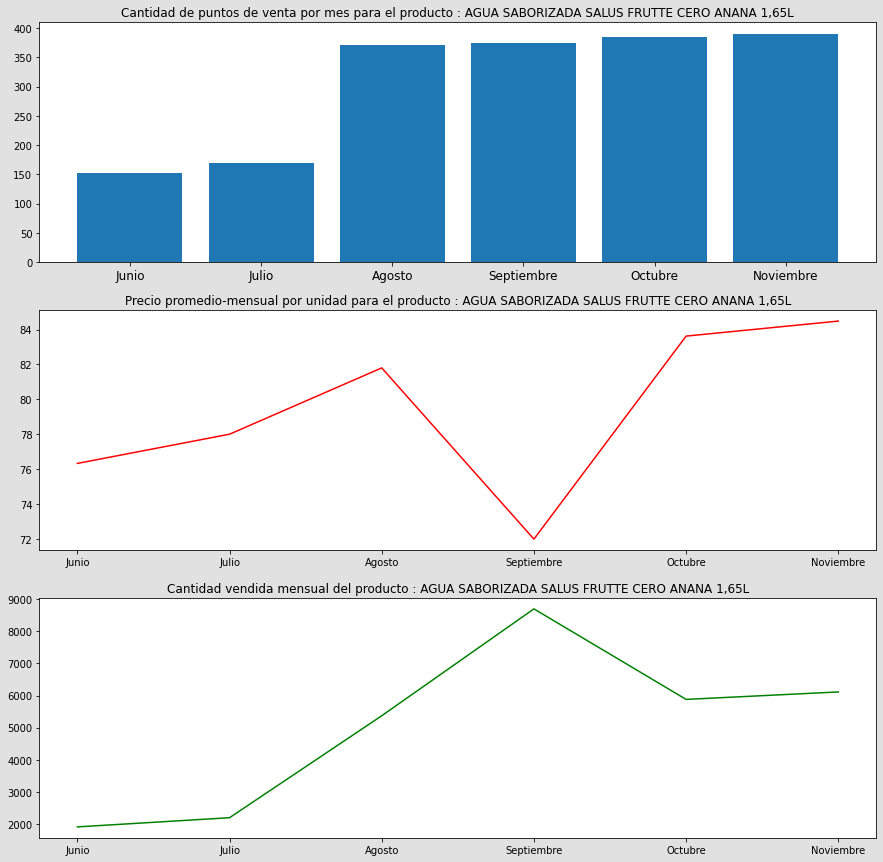

[153, 170, 371, 374, 385, 390]


In [ ]:
import pandas as pd

file_prod = 'productos.csv'
file_vent = 'ventas.csv'

df_prod = pd.read_csv(file_prod)
df_vent = pd.read_csv(file_vent)

# Agregamos un columna al DataFrame con el precio de venta unitario
df_vent['Precio. U'] = df_vent['imp_vta']/df_vent['cant_vta']

producto = 'AGUA SABORIZADA SALUS FRUTTE CERO ANANA 1,65L'


# Codigo de barra del producto : AGUA SABORIZADA SALUS FRUTTE CERO ANANA 1,65L
cod_bar = list(df_prod['codigo_barras'].loc[ df_prod['descripcion'] == producto])[0]

# Filtramos las ventas del producto : AGUA SABORIZADA SALUS FRUTTE CERO ANANA 1,65L
df_vent_frutte_cero = df_vent[ df_vent['codigo_barras'] == int(cod_bar) ]


pdv_por_mes = []
meses = ['Junio','Julio','Agosto','Septiembre','Octubre','Noviembre']
precio_unidad_por_mes = []
cantidad_por_mes = []

### Mes de Junio ###
## Filtramos por mes , df_vent_frutte_cero
mask = (df_vent_frutte_cero['fecha_comercial'] > '2020-06-01') & (df_vent_frutte_cero['fecha_comercial'] <= '2020-06-30')
df_vent_junio = df_vent_frutte_cero.loc[mask]
## Agregamos a la lista ( cantidad_de_pdv )
pdv_por_mes.append( len(pd.unique(df_vent_junio['pdv_codigo'])) )
## Agregamos a la lista ( promedio_de_precio_unitario )
precio_unidad_por_mes.append( df_vent_junio['Precio. U'].sum() / len( df_vent_junio['Precio. U'] ) )
## Agregamos a la lista ( El volumen total del prod. por mes )
cantidad_por_mes.append( df_vent_junio['cant_vta'].sum() )



### Mes de Julio ###
## Filtramos por mes , df_vent_frutte_cero
mask = (df_vent_frutte_cero['fecha_comercial'] > '2020-07-01') & (df_vent_frutte_cero['fecha_comercial'] <= '2020-07-31')
df_vent_julio = df_vent_frutte_cero.loc[mask]
## Agregamos a la lista ( cantidad_de_pdv )
pdv_por_mes.append( len(pd.unique(df_vent_julio['pdv_codigo'])) )
## Agregamos a la lista ( promedio_de_precio_unitario )
precio_unidad_por_mes.append( df_vent_julio['Precio. U'].sum() / len( df_vent_julio['Precio. U'] ) )
## Agregamos a la lista ( Volumen de productos vendidos )
cantidad_por_mes.append( df_vent_julio['cant_vta'].sum() )



### Mes de agosto ###
## Filtramos por mes , df_vent_frutte_cero
mask = (df_vent_frutte_cero['fecha_comercial'] > '2020-08-01') & (df_vent_frutte_cero['fecha_comercial'] <= '2020-08-31')
df_vent_agosto = df_vent_frutte_cero.loc[mask]
## Agregamos a la lista ( cantidad_de_pdv )
pdv_por_mes.append( len(pd.unique(df_vent_agosto['pdv_codigo'])) )
## Agregamos a la lista ( promedio_de_precio_unitario )
precio_unidad_por_mes.append( df_vent_agosto['Precio. U'].sum() / len( df_vent_agosto['Precio. U'] ) )
## Agregamos a la lista ( Volumen de productos vendidos )
cantidad_por_mes.append( df_vent_agosto['cant_vta'].sum() )



### Mes de septiembre ###
## Filtramos por mes , df_vent_frutte_cero
mask = (df_vent_frutte_cero['fecha_comercial'] > '2020-09-01') & (df_vent_frutte_cero['fecha_comercial'] <= '2020-09-30')
df_vent_septiembre = df_vent_frutte_cero.loc[mask]
## Agregamos a la lista ( cantidad_de_pdv )
pdv_por_mes.append( len(pd.unique(df_vent_septiembre['pdv_codigo'])) )
## Agregamos a la lista ( promedio_de_precio_unitario )
precio_unidad_por_mes.append( df_vent_septiembre['Precio. U'].sum() / len( df_vent_septiembre['Precio. U'] ) )
## Agregamos a la lista ( Volumen de productos vendidos )
cantidad_por_mes.append( df_vent_septiembre['cant_vta'].sum() )



### Mes de octubre ###
## Filtramos por mes , df_vent_frutte_cero
mask = (df_vent_frutte_cero['fecha_comercial'] > '2020-10-01') & (df_vent_frutte_cero['fecha_comercial'] <= '2020-10-31')
df_vent_octubre = df_vent_frutte_cero.loc[mask]
## Agregamos a la lista ( cantidad_de_pdv )
pdv_por_mes.append( len(pd.unique(df_vent_octubre['pdv_codigo'])) )
## Agregamos a la lista ( promedio_de_precio_unitario )
precio_unidad_por_mes.append( df_vent_octubre['Precio. U'].sum() / len( df_vent_octubre['Precio. U'] ) )
## Agregamos a la lista ( Volumen de productos vendidos )
cantidad_por_mes.append( df_vent_octubre['cant_vta'].sum() )



### Mes de noviembre ###
## Filtramos por mes , df_vent_frutte_cero
mask = (df_vent_frutte_cero['fecha_comercial'] > '2020-11-01') & (df_vent_frutte_cero['fecha_comercial'] <= '2020-11-30')
df_vent_noviembre = df_vent_frutte_cero.loc[mask]
## Agregamos a la lista ( cantidad_de_pdv )
pdv_por_mes.append( len(pd.unique(df_vent_noviembre['pdv_codigo'])) )
## Agregamos a la lista ( promedio_de_precio_unitario )
precio_unidad_por_mes.append( df_vent_noviembre['Precio. U'].sum() / len( df_vent_noviembre['Precio. U'] ) )
## Agregamos a la lista ( Volumen de productos vendidos )
cantidad_por_mes.append( df_vent_noviembre['cant_vta'].sum() )




plt.figure(1,figsize=(15,15),facecolor="#e1e1e1")
plt.subplot(3,1,1)
plt.title( f"Cantidad de puntos de venta por mes para el producto : {producto}" )
plt.bar( meses , pdv_por_mes )
plt.xticks(fontsize=12)
plt.subplot(3,1,2)
plt.title( f"Precio promedio-mensual por unidad para el producto : {producto}" )
plt.plot( meses , precio_unidad_por_mes ,'r' )
plt.subplot(3,1,3)
plt.title( f"Cantidad vendida mensual del producto : {producto}" )
plt.plot( meses , cantidad_por_mes ,'g' )
plt.show()

print(pdv_por_mes)

Se concluye de las graficas que , el incremento de las ventas del producto ***SALUS FRUTTE CERO ANANA 1,65L*** son posiblemente por:

* El incremento considerable de los puntos de venta de los puntos de julio a septiembre.
* La disminucion del precio de venta promedio durante del mes de septiembre